In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
hr = pd.read_csv('D:\DataTrained Projects\Evaluation Projects\Week 1/hr_attrition.csv')
hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have few object datatype columns and few intezer datatype columns and all columns are having equal number of records, so there might me no outliers

In [6]:
hr.isnull().values.any()
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that there are no outliers in data

In [7]:
hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [10]:
hr=hr.drop('EmployeeNumber',axis=1)
hr=hr.drop('StandardHours',axis=1)
hr=hr.drop('EmployeeCount',axis=1)
hr=hr.drop('Over18',axis=1)

We dropped columns which have less significance in our analysis

EmployeeNumber has all unique values

StandardHours,Over18 and EmployeeCount has only single value

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in hr.columns:
    if hr[col].dtype == np.number:
        continue
    hr[col]=le.fit_transform(hr[col])

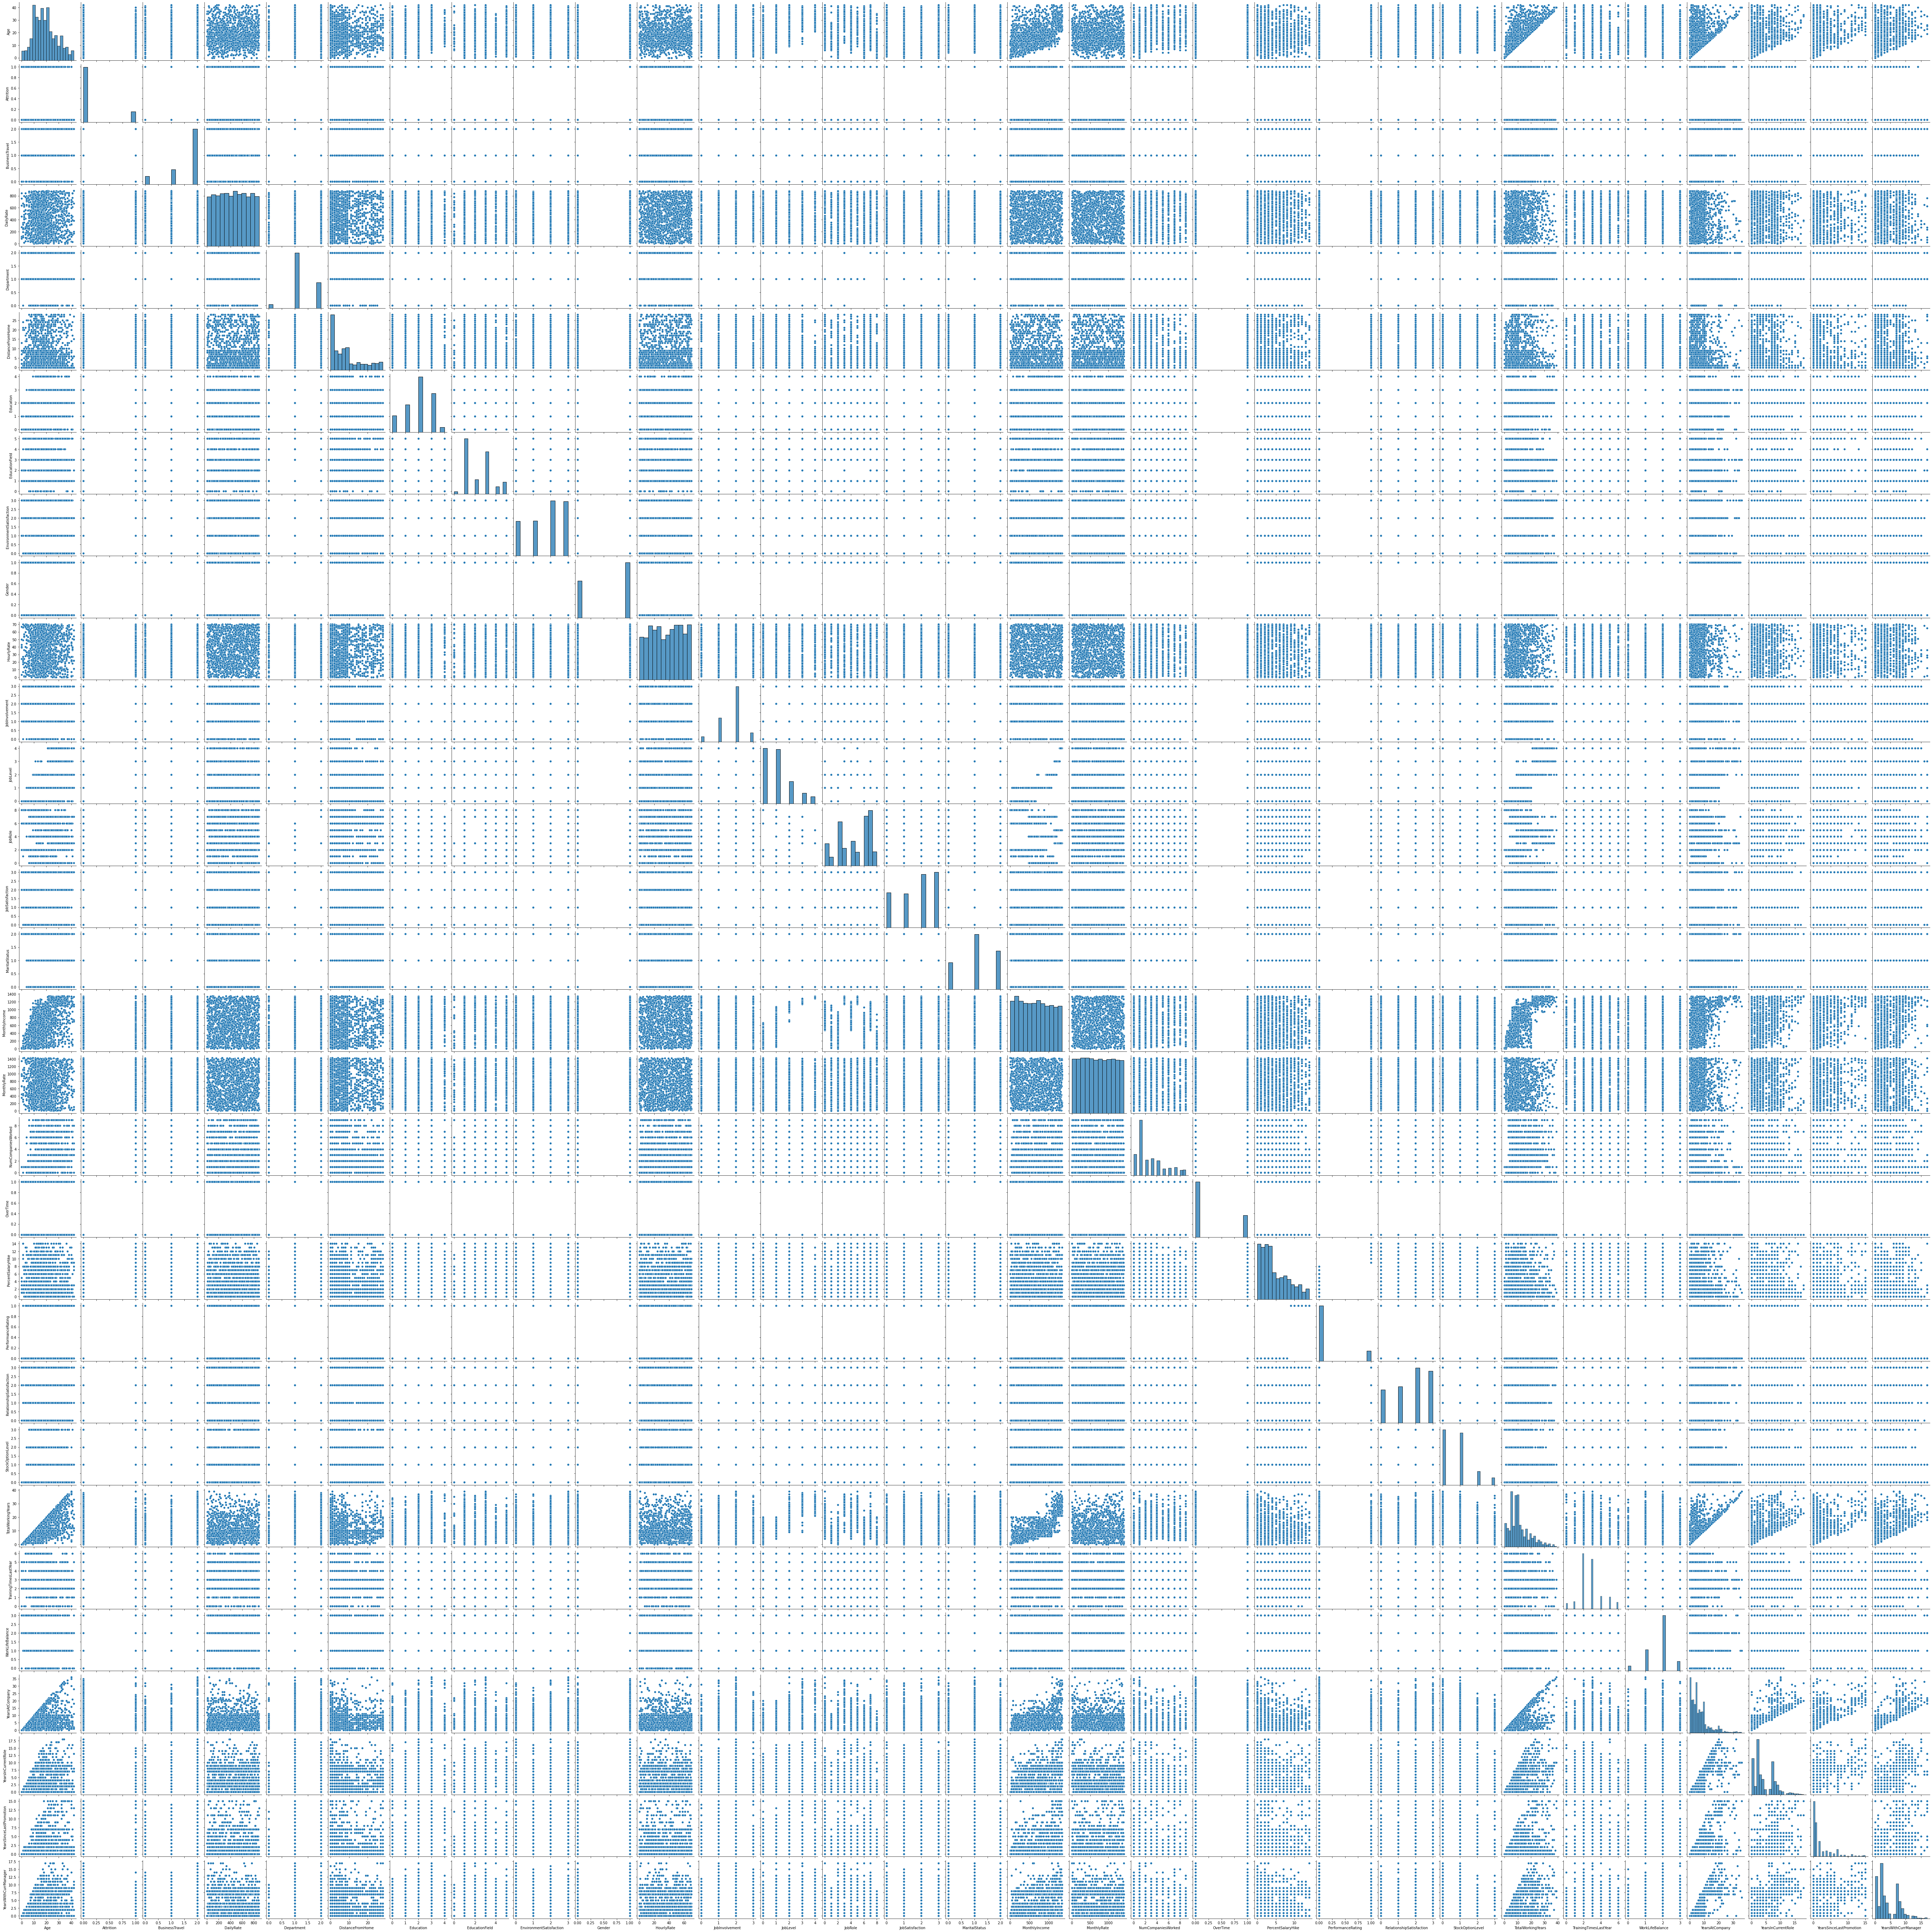

In [24]:
sns.pairplot(hr)

We could from pair plot that there is no much skewness in data

<AxesSubplot:xlabel='Attrition', ylabel='count'>

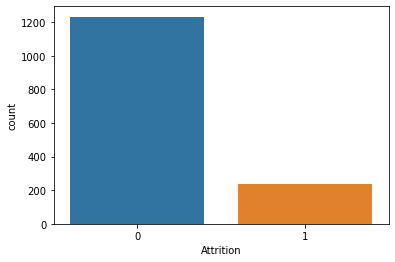

In [25]:
sns.countplot(hr['Attrition'])

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

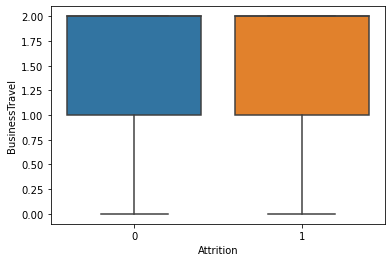

In [26]:
sns.boxplot('Attrition','BusinessTravel',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

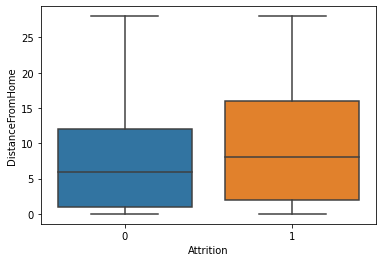

In [27]:
sns.boxplot('Attrition','DistanceFromHome',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

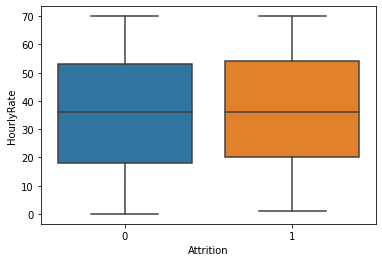

In [28]:
sns.boxplot('Attrition','HourlyRate',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

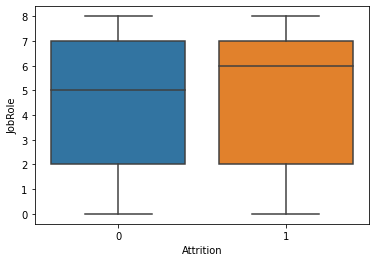

In [29]:
sns.boxplot('Attrition','JobRole',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

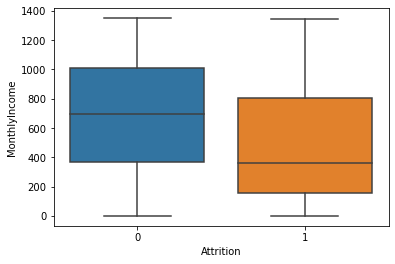

In [30]:
sns.boxplot('Attrition','MonthlyIncome',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

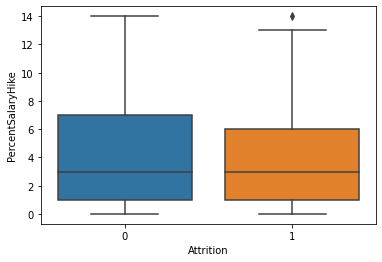

In [31]:
sns.boxplot('Attrition','PercentSalaryHike',data=hr)

<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

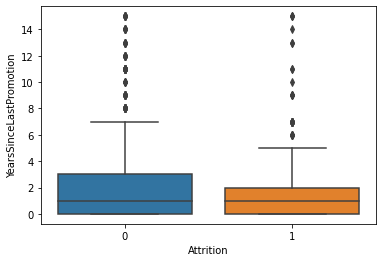

In [32]:
sns.boxplot('Attrition','YearsSinceLastPromotion',data=hr)

Checked few columns for outliers

In [18]:
corr_mat = hr.corr()
corr_mat

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010557   
Attrition                -0.159205   1.000000        0.000074  -0.056605   
BusinessTravel            0.024751   0.000074        1.000000  -0.004103   
DailyRate                 0.010557  -0.056605       -0.004103   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007796   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004738   
Education                 0.208034  -0.031373        0.000757  -0.016550   
EducationField           -0.040873   0.026846        0.023724   0.038129   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018462   
Gender                   -0.036311   0.029453       -0.032981  -0.011194   
HourlyRate                0.024287  -0.006846        0.026528   0.022916   
JobInvolvement            0.029820  -0.130016        0.039062   0.046072   
JobLevel                  0.509604  -0.169105        0.019311   0.003355   
JobRole                  -0.122427   0.067151        0.002724  -0.009127   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030712   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069527   
MonthlyIncome             0.472198  -0.196165        0.025095   0.015784   
MonthlyRate               0.028362   0.015273       -0.014115  -0.032051   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.037304   
OverTime                  0.028062   0.246118        0.016543   0.008902   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022339   
PerformanceRating         0.001904   0.002889       -0.026341   0.000633   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.008530   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.041786   
TotalWorkingYears         0.680409  -0.171571        0.034144   0.014877   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002227   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037791   
YearsAtCompany            0.309796  -0.136932       -0.014720  -0.032461   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.010997   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033431   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.025849   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007796         -0.004738  -0.016550   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.157526          0.011962   0.124561   
MonthlyRate                 0.023898          0.028298  -0.025694   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

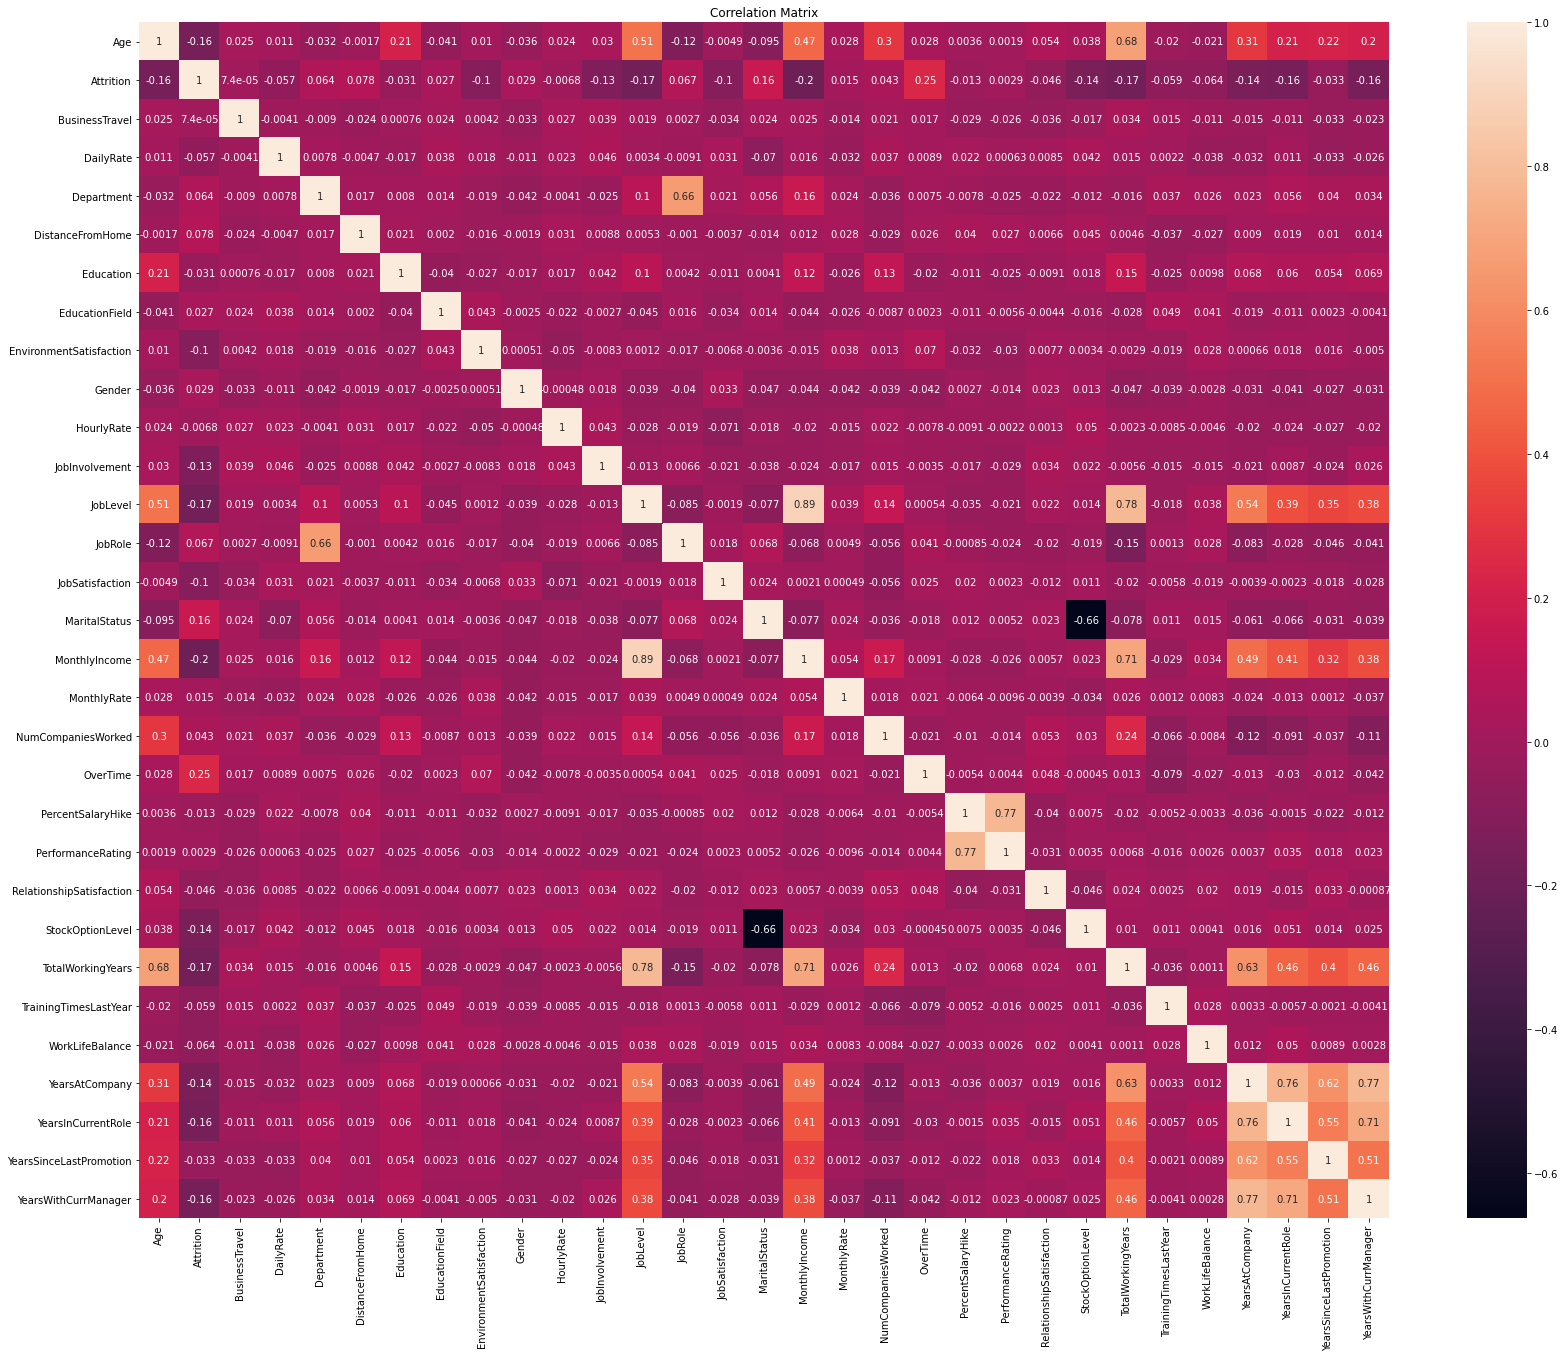

In [21]:
plt.figure(figsize=[28,22])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
x=hr.drop('Attrition',axis=1)
y=hr['Attrition']

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.4463504   0.59004834  0.71391447 ... -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521 -0.91319439 -1.30244563 ...  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343    0.59004834  1.42812421 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-1.08667552  0.59004834 -1.59444298 ... -0.61549158 -0.67914568
  -0.31487349]
 [ 1.32236521 -0.91319439  0.53634851 ...  0.48889978 -0.67914568
   1.08689522]
 [-0.32016256  0.59004834 -0.42250766 ... -0.33939374 -0.36871529
  -0.59522723]]


In [34]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

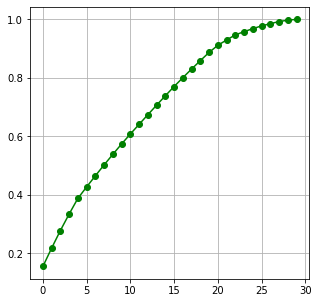

In [35]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'go-')
plt.grid()

from above graph we can observe that 90% of data is explained by first 20 variables

In [36]:
pca_new = PCA(n_components=20)
x_new = pca_new.fit_transform(x)

In [37]:
print(x_new)

[[-0.19900312  0.31647636 -1.90966521 ...  1.31311397 -0.48118381
   1.09095857]
 [ 0.70101534 -1.25614383  2.90559977 ... -0.29918506 -0.22519963
   0.30022453]
 [-2.72587344  1.10433401 -0.26706728 ...  0.42641516  0.18543087
  -0.05474542]
 ...
 [-1.06173645 -0.1497543   2.4956313  ...  0.81468901  1.45253704
   0.12609108]
 [ 1.08969068 -0.67542927 -1.18616022 ... -0.05025724 -0.37522932
  -0.14758301]
 [-1.10847785  0.49578853 -0.56637662 ...  0.73036619  1.01724955
   0.21648804]]


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1102, 30)
(1102,)
(368, 30)
(368,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
logmodel_predict = logmodel.predict(x_test)

In [42]:
from sklearn.model_selection import cross_val_score
results = []
cv_score_LR = cross_val_score(estimator = logmodel, X = x_train, y = y_train.ravel(), cv = 10)
print('LOGISTIC REGRESSION REPORT')
print("CV Score: ", cv_score_LR.mean())

y_train_predict_LR = logmodel.predict(x_train)
train_accuracy_LR = accuracy_score(y_train, y_train_predict_LR)
print("Training set accuracy: ", train_accuracy_LR)

y_test_predict_LR = logmodel.predict(x_test)
test_accuracy_LR = accuracy_score(y_test, y_test_predict_LR)
print("Test set accuracy: ", test_accuracy_LR)

results.append(test_accuracy_LR)

LOGISTIC REGRESSION REPORT
CV Score:  0.8439312039312041
Training set accuracy:  0.8557168784029038
Test set accuracy:  0.8614130434782609


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
model_KNN.fit(x_train, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [45]:
cv_score_KNN = cross_val_score(estimator = model_KNN, X = x_train, y = y_train.ravel(), cv = 10)
print('KNN REPORT')
print("CV Score: ", cv_score_KNN.mean())

y_train_predict_KNN = model_KNN.predict(x_train)
train_accuracy_KNN = accuracy_score(y_train, y_train_predict_KNN)
print("Training set accuracy: ", train_accuracy_KNN)

y_test_predict_KNN = model_KNN.predict(x_test)
test_accuracy_KNN = accuracy_score(y_test, y_test_predict_KNN)
print("Test set accuracy: ", test_accuracy_KNN)

results.append(test_accuracy_KNN)

KNN REPORT
CV Score:  0.8348566748566748
Training set accuracy:  1.0
Test set accuracy:  0.8532608695652174


In [46]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
model_DT.fit(x_train, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [47]:
cv_score_DT = cross_val_score(estimator = model_DT, X = x_train, y = y_train.ravel(), cv = 10)
print('DT REPORT')
print("CV Score: ", cv_score_DT.mean())

y_train_predict_DT = model_DT.predict(x_train)
train_accuracy_DT = accuracy_score(y_train, y_train_predict_DT)
print("Training set accuracy: ", train_accuracy_DT)

y_test_predict_DT = model_DT.predict(x_test)
test_accuracy_DT = accuracy_score(y_test, y_test_predict_DT)
print("Test set accuracy: ", test_accuracy_DT)

results.append(test_accuracy_DT)

DT REPORT
CV Score:  0.7704422604422604
Training set accuracy:  1.0
Test set accuracy:  0.7907608695652174


In [48]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 900, random_state=40)
model_RF.fit(x_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=900,
                       random_state=40)

In [49]:
cv_score_RF = cross_val_score(estimator = model_RF, X = x_train, y = y_train.ravel(), cv = 10)
print('RF REPORT')
print("CV Score: ", cv_score_RF.mean())

y_train_predict_RF = model_RF.predict(x_train)
train_accuracy_RF = accuracy_score(y_train, y_train_predict_RF)
print("Training set accuracy: ", train_accuracy_RF)

y_test_predict_RF = model_RF.predict(x_test)
test_accuracy_RF = accuracy_score(y_test, y_test_predict_RF)
print("Test set accuracy: ", test_accuracy_RF)

results.append(test_accuracy_RF)

RF REPORT
CV Score:  0.8548239148239147
Training set accuracy:  1.0
Test set accuracy:  0.8586956521739131


From above cross validation, we can observe that Logistic Regression is having least difference between accuracy score and cross validation.

So, Logistic Regression Model with accuracy score of 86.1% is the best model

In [50]:
import joblib
joblib.dump(logmodel,'RedWine.pkl')

['RedWine.pkl']